# <b>JPMC Case Study</b>
-------------------------------------------------------------------

##### <b>Name: </b> Aparna Sakshi
##### <b>Institute: </b> Indian Institute of Technology, Kharagpur
##### <b>Branch: </b> Mathematics and Computing
##### <b>Year of study: </b> Third year
----------------------------------------------------

## <b>Case Study A:</b> Options

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
"""
    Investment is a class defining derivative/option
    
    class variables:
        position: can take 2 values 1)long, 2)short, to specify long position or short position respectively
        option: can take 2 values 1)call, 2)put, to specify call option or put option
        strike: price of the strike
        premium: premium price
        payoff: payoff function, although it is a class variable, it can be called a function, 
        where input is stock price, and output is payoff at that stock price
        
    methods:
        get_portfolio: returns the dictionary of portfolio of the corresponding class
        
        
        
"""
class Investment:
    def __init__(self, position, option, strike, premium):
        self.position = position
        self.option = option
        self.strike = strike
        self.premium = premium
        self.payoff=None
        if position=="long" and option=="call":
            self.payoff= lambda stock: max(0, stock-strike)-premium
        elif position=="long" and option=="put":
            self.payoff= lambda stock: max(0, strike-stock)-premium
        elif position=="short" and option=="call":
            self.payoff= lambda stock: -max(0, stock-strike)+premium
        elif position=="short" and option=="put":
            self.payoff= lambda stock: -max(0, strike-stock)+premium
        else:
            raise Exception("valid values were not given to calulate payoff")
            
    def get_portfolio(self):
        return {"position":self.position,"option":self.option,"strike":self.strike,"premium":self.premium}
    

    

In [3]:
"""
    payoff_plot is a function to plot payoff vs stocks for a given list of portfolios

    params:
        investments: List of Investment
"""
def payoff_plot(investments):
    # x axis values
    x = list(range(101))
    
    # corresponding y axis values
    y = [sum([investment.payoff(stock) for investment in investments]) for stock in x]

    # plotting the points 
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('stock')
    # naming the y axis
    plt.ylabel('payoff')

    # giving a title to my graph
    plt.title('payoff vs stock')

    # function to show the plot
    plt.show()
    
        
    
        
    
    

<b>Q1: a:</b> Show the payoff plot when you long a call and short a put, both at the strike of $50?<br><br>
<u>Solution format:</u>
- If you have written the code, please provide a standalone function (no-arguments) that generates 
the payoff plot 

In [4]:
"""
    Investment1: I1
        position=long
        option=call
        strike=$50
        premium=$4 ->default for call option
        
    Investment2: I2
        position=short
        option=put
        strike=$50
        premium=$2 ->default for put option
"""

def Solution_1a():    
    I1 = Investment("long","call",50,4)
    I2 = Investment("short","put",50,2)    
    investments=[I1,I2]
    payoff_plot(investments)


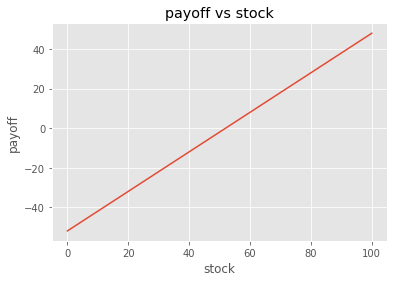

In [5]:
Solution_1a()

<b>Q1: b:</b> Based on your understanding of the payoff plot in Q1: a: what real-world asset is the portfolio trying to mimic? <br>
<u>Solution format:</u> Describe in words.

<i><b>Ans: </b>When a person purchases share of a particular company his payoff will be shown by the above plot when the stock price varies. Share purchase price is stock value on the line corresponding to when payoff is 0.</i>

<b>Q2: a:</b> Based on the plot below, can you replicate the payoff by a combination of calls and puts? 
The peak in the graph is at (50, 6) and the absolute slopes of the sides = 1. 

<u>Solution format:</u>
- If you have written the code, please provide a standalone function (no-arguments) that generates the plot and returns the portfolio of calls and puts that you have chosen to replicate the payoff. 

In [6]:
"""
    To generate the plot, following portfolios are chosen:
    
    Investment1: I1
        position=short
        option=call
        strike=$50
        premium=$4 ->default for call option
        
    Investment2: I2
        position=short
        option=put
        strike=$50
        premium=$2 ->default for put option
"""

def Solution_2a():    
    I1 = Investment("short","call",50,4)
    I2 = Investment("short","put",50,2)    
    investments=[I1,I2]
    payoff_plot(investments)
    #returning portfolios
    return [I.get_portfolio() for I in investments]


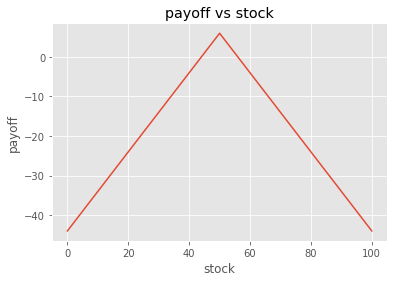

[{'position': 'short', 'option': 'call', 'strike': 50, 'premium': 4},
 {'position': 'short', 'option': 'put', 'strike': 50, 'premium': 2}]

In [7]:
Solution_2a()

<b>Q2: b:</b> What could be the investor’s belief if she/he is targeting the payoff shown in Q2: a:? In other words, at what scenarios would such a strategy give positive returns to the investor? <br>
<u>Solution format:</u> Describe in words.

<i><b>Ans: </b>The investor believes that stock price will almost remain constant. </i>

<b>Q3: </b>The investor seems to be happy with his/her strategy in Q2: a: but worried about the potential uncapped losses. How could the investor achieve the below payoff? The peak in the graph is at (54, 4) and bases of the peak are at (50, 0) and (58, 0). 

<u>Solution format:</u>
- If you have written the code, please provide a standalone function (no-arguments) that generates the plot and returns the portfolio of calls and puts that you have chosen to replicate the payoff. 

In [8]:
"""
    To generate the plot, following portfolios are chosen:
    
    Investment1: I1
        position=long
        option=call
        strike=$50
        premium=$4 ->default for call option
        
    Investment2: I2
        position=long
        option=put
        strike=$58
        premium=$2 ->default for put option
        
    Investment2: I3
        position=short
        option=call
        strike=$54
        premium=$4 ->default for put option
        
    Investment2: I4
        position=short
        option=put
        strike=$54
        premium=$2 ->default for put option
        
    Investment2: I5
        position=long
        option=call
        strike=$100
        premium=$4 ->default for put option
"""





def Solution_3():    
    I1 = Investment("long","call",50,4)
    I2 = Investment("long","put",58,2) 
    I3 = Investment("short","call",54,4)
    I4 = Investment("short","put",54,2) 
    I5 = Investment("long","call",100,4) 

    investments=[I1,I2,I3,I4,I5]
    payoff_plot(investments)
    #returning portfolios
    return [I.get_portfolio() for I in investments]

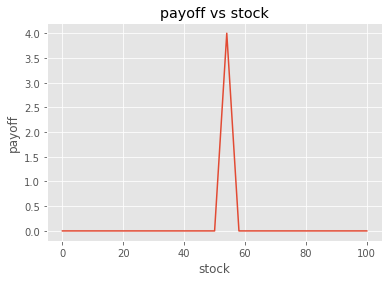

[{'position': 'long', 'option': 'call', 'strike': 50, 'premium': 4},
 {'position': 'long', 'option': 'put', 'strike': 58, 'premium': 2},
 {'position': 'short', 'option': 'call', 'strike': 54, 'premium': 4},
 {'position': 'short', 'option': 'put', 'strike': 54, 'premium': 2},
 {'position': 'long', 'option': 'call', 'strike': 100, 'premium': 4}]

In [9]:
Solution_3()

<b>Q4:</b> Imagine that calls and puts are available at all strikes in range [0, 100] in multiples of 0.5 only. And also assume that the premiums of all calls and puts is 0.0. What is the nearest possible replication that can be done such that the portfolio behaves as a custom call option struck at 50 with the portfolio payoff as {1 if stock price > 50, 0 otherwise}? 

<u>Solution format:</u>
- If you have written the code, please provide a standalone function (no-arguments) that generates the plot and returns the portfolio of calls and puts that you have chosen to replicate the payoff. 

In [10]:
"""
    To generate the plot, following portfolios are chosen:
    
    Investment1: I1
        position=long
        option=call
        strike=$50
        premium=$0
        
    Investment2: I2
        position=short
        option=call
        strike=$50.5
        premium=$0
        
    Investment2: I3
        position=long
        option=call
        strike=$50
        premium=$0
        
    Investment2: I4
        position=short
        option=call
        strike=$50.5
        premium=$0
        
"""




def Solution_4():    
    I1 = Investment("long","call",50,0)
    I2 = Investment("short","call",50.5,0)
    I3 = Investment("long","call",50,0)
    I4 = Investment("short","call",50.5,0)
    investments=[I1,I2,I3,I4]
    payoff_plot(investments)
    #returning portfolios
    return [I.get_portfolio() for I in investments]

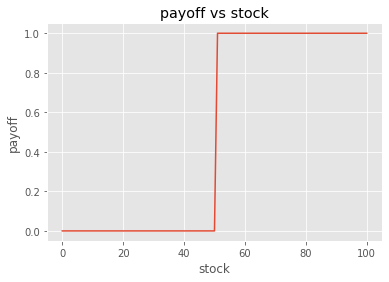

[{'position': 'long', 'option': 'call', 'strike': 50, 'premium': 0},
 {'position': 'short', 'option': 'call', 'strike': 50.5, 'premium': 0},
 {'position': 'long', 'option': 'call', 'strike': 50, 'premium': 0},
 {'position': 'short', 'option': 'call', 'strike': 50.5, 'premium': 0}]

In [11]:
Solution_4()

<u><b>Probability:</b></u><br>
For the below questions, assume that you have 3 days to sell a stock that you hold, and the 
potential buyer is quoting you the prices each day. You can either accept the price the buyer 
quotes, or wait for the next day’s quote by rejecting the quote. There is no chance of changing 
your previous decision.


<b>Q5: a:</b> The buyer is free to quote any price he/she wishes and the quotes do not appear to follow 
any standard probability distributions. For example, the quotes can be 10000X or 0.001X of the 
previous quote. What should be your strategy to optimize your chances of selling the stock at the 
highest possible price across the three days? <br>
<u>Solution format:</u> Describe in words.


<i><b>Ans:</b> Let's rank the days based on the quoted price of the buyer each day:<br/>
    We observe the following possible ordering will occur and they will be equally likely:<br>
    <ul>
        <li> 1 2 3</li>
        <li> 1 3 2</li>
        <li> 2 1 3</li>
        <li> 2 3 1</li>
        <li> 3 1 2</li>
        <li> 3 2 1</li>
    </ul>
    Let quote price on day i be Qi.<br>
    We can't guarantee which one will be maximum, but on the second day we'll know that whether quote price on day2 was greater than that on day1 or not. If Q2 &lt; Q1, then we definetly know that Q2 is not maximum, we can then sell on day3 since we can't sell on day1 and day2 is already ruled out. If Q2 &gt; Q1, our possibilities are limited to [2 1 3], [2 3 1], [3 2 1] (i.e) there are 2/1 odds of Q2 being the maximum, hence we'll choose day2 in this case.
    
</i>


<b>Q5: b:</b> Using your strategy in Q5: a:, what is the probability that you would sell the stock at the 
maximum price possible? <br>
<u>Solution format:</u> Describe in words.


<i><b>Ans: </b> To calculate the probability, we divide the situation into 2 senarios:<br>
<u>Case1: Q2 &lt; Q1</u><br>
Possibilities where Q2 &lt; Q1 are: [1 2 3], [1 3 2], [3 2 1]. So the probability that Q2 &lt; Q1 is $\frac{1}{2}$. Based on above strategy, we'll choose day3 as our guess. Probabilty that day3 will be correct guess is $\frac{1}{3}$. Hence the probability in Case 1 is $\frac{1}{6}$.<br>
<u>Case1: Q2 &gt; Q1</u><br>
Possibilities where Q2 &gt; Q1 are: [2 1 3], [2 3 1], [3 2 1]. So the probability that Q2 &gt; Q1 is $\frac{1}{2}$. Based on above strategy, we'll choose day2 as our guess. Probabilty that day2 will be correct guess is $\frac{2}{3}$. Hence the probability in Case 2 is $\frac{2}{6}$.
<br>
Hence total probability of choosing the day with maximum quoted price is the sum of probabilities in Case1 and Case2 (i.e) $\frac{1}{2}$.
        
    
</i>

<b>Q6: a:</b> Imagine that the quotes are always in multiples of 10, and always range in [110, 160] with equal probability, i.e., 1/6th chance of drawing one of {110, 120, 130, 140, 150, 160}. What strategy should you adopt to maximize your expected returns? <br>
<u>Solution format:</u> Describe in words.

<i><b>Ans:</b> Let quote price on day i be Qi.<br>
We know that whenever probability of Q1 being the maximum is greater than $\frac{1}{2}$, probability of Q2 and Q3 being the maximum is less than half $\frac{1}{2}$ and hence less than that of Q1. Hence if we find the probability of Q1 being maximum greater than $\frac{1}{2}$, we'll choose day 1.
</i>

|Quote price on day1| Probability that day1 has maximum quote price given Q1|
|:--|:--|
|110| $\frac{1}{36}$|
|120| $\frac{4}{36}$|
|130| $\frac{9}{36}$|
|140| $\frac{16}{36}$|
|150| $\frac{25}{36}$|
|160| $\frac{36}{36}$|


<i>Based on the above, table if Q1={150, 160}, stocks will be sold on day 1<br>
If the stock isn't sold on day 1, and if the probability of day2 having the maximum quote price given Q1 and Q2 is greater than $\frac{1}{2}$, then stocks will be sold on day 2, else the stocks will be sold on day 3 no matter the price of Q3. 
</i>

|Quote price on day1| Quote price on day2| Probability that day2 has maximum quote price given Q1 and Q2|
|:--|:--|:--|
|[110]               | 110| $\frac{1}{6}$|
|[120,110]           | 120| $\frac{2}{6}$|
|[130, 120, 110]     | 130| $\frac{3}{6}$|
|[140, 130, 120, 110]| 140| $\frac{4}{6}$|
|[140, 130, 120, 110]| 150| $\frac{5}{6}$|
|[140, 130, 120, 110]| 160| $\frac{6}{6}$|

<i> Case where Q2 &lt; Q1 is negected as probability of Q2 being maximum would be 0 in that case.<br>
    Based on above table, if stocks are not sold on day 1 and Q2={130, 140, 150, 160} then stocks will be sold on day 2.
    If stocks are not sold out day 2 even, then they will be sold on day 3. Below are the cases where stocks will be sold on day3 and Q3 is the maximum.  
</i>

|Quote price on day1| Quote price on day2| Quote price on day3|
|:--|:--|:--|
|[110]               | [110]    |110| 
|[120,110]           | [110,120]|120| 
|[130, 120, 110]     | [110,120]|130| 
|[140, 130, 120, 110]| [110,120]|140| 
|[140, 130, 120, 110]| [110,120]|150| 
|[140, 130, 120, 110]| [110,120]|160| 

<b>Q6: b:</b> What is the expected return in Q6: a:? <br>
<u>Solution format:</u> Describe in words. 

<u>Total return in day 1:</u><br>
$\frac{1}{6}$ x $\frac{25}{36}$ x 150 + $\frac{1}{6}$ x $\frac{36}{36}$ x 160<br>

<u>Total return in day 2:</u><br>
$\frac{3}{6}$ x $\frac{1}{6}$ x $\frac{3}{6}$ x 130 + $\frac{4}{6}$ x $\frac{1}{6}$ x $\frac{4}{6}$ x 140 + $\frac{4}{6}$ x $\frac{1}{6}$ x $\frac{5}{6}$ x 150+ $\frac{4}{6}$ x $\frac{1}{6}$ x $\frac{6}{6}$ x 160<br>

<u>Total return in day 3:</u><br>
$\frac{1x110+4x120+6x130+8x140+8x150+8x160}{6x6x6}$ <br>

<u>Total return is:</u><br>
114.5 

<u><b>Statistics:</b></u><br>
Imagine two banks (A and B) in a country which are governed by a central authority, have similar 
customer base and offer similar products and services. Therefore, any change in the business 
environment will have a similar impact on both the banks. In the ideal world, if the stock price of 
Bank A rises by x%, then stock price of Bank B is also expected to rise, at least by y% and vice 
versa. But, since each bank is an independent entity, it will be also subject to its internal 
environment. For example, assume that there is a change in the top echelon of Bank A, leading 
to a negative effect on its stock price; Bank B’s stock will still maintain its status quo as this event 
is localized to Bank A. Ceteris paribus, Bank A’s stock price is expected to maintain its usual 
relation with Bank B in some time.


<b>Q7: a: </b>Which statistical measure would you use to find the most suitable pair of stocks that are in tandem with the above scenario and why? <br>
<u>Solution format: </u>Describe in words.


<i><b>Ans: </b>In order to find the most suitable pair of stocks that are in tandem with the above scenario, one can use correlation coefficient as statistical measure, since correlation coefficient can measure similarity between two variables. Since the trends in the rise of stock are similar, the variables with correlation coefficient close to 1 (or above a certain threshold to count for internal losses) will resemble the above situation. </i>

<b>Q7: b:</b> Explain how you can leverage in the scenario described above to gain profit in the market and how to minimize the risk ssociated with it? <br>
<u>Solution format:</u> Describe in words.

<i><b>Ans: </b>To gain benefit from the above senario, if one observes an increase in the stock price of one of the banks, then they can purchase the stocks of other bank as the other bank's stocks is also going to rise eventually. On the other way, one can sell their stocks of bank B if they find decrease in stock price of Bank A and vice versa.   
In order to minimize the risk associated with it, one can purchase a call option for bank A if they find an increase in stock price of bank B or a put option for bank A if they find a decrease in stock price of bank B or vice versa.</i>

----------------------------------------------------------
## <b>Case Study B:</b> The Automaton

In [12]:
import math
import numpy as np
from collections import Counter

<b>Deterministic cellular automata</b>

<b>Q1: a:</b> Given the seed generation of a cellular automaton containing 4 cells, and the rules for cell 
transformation, determine the state of cells in the grid after 4 generations (i.e. 4 time steps).<br>
Seed Generation (Generation 0):


|1  |2  |3  |4  |
|:--|:--|:--|:--|
| 1 | 1 | 0 | 0 |

|Parent Configuration| Child value|
|:--|:--|
|0| 1|
|1| 1|
|2| 0|
|3| 0|
|4| 1|
|5| 0|
|6| 1|
|7| 0|


<u>Solution format:</u><br>
Write the answer in the form of a 1D grid containing 4 cells.


|1  |2  |3  |4  |
|:--|:--|:--|:--|
| 0 | 0 | 1 | 0 |

<b>Q1: b:</b> If each generation of the cellular automaton is printed, it will form wondrous patterns. Some of these patterns might repeat, some might be completely random. For the automaton described in Part 1, print each generation of the automaton in a new line and 
replace all 1s with ‘|’ and 0s with ‘.’ .


<u>Solution format:</u>
1) Write the answer in the form of a 4 lines, each containing 4 characters depicting the generation. <br>
2) Additionally, write a program or pseudo code to do the above

In [13]:
def seed_generation(cells,gen,rule): 
    for j in range(gen):
        n=len(cells)
        new_cells=[]
        for i in range(n):
            parent=4*cells[(i-1)%n]+2*cells[i]+cells[(i+1)%n]
            new_cells.append(rule[parent])
        cells=new_cells
        yield new_cells
    

    
def print_cells(cells):
    print("".join(['|' if cell == 1 else '.' for cell in cells]))
    

In [14]:
gen=4
#cells at gen=0
cells=[1,1,0,0]
#parent->child rule
rule=[1,1,0,0,1,0,1,0]
for seed in seed_generation(cells,gen,rule):
    print_cells(seed)


.|||
...|
|||.
..|.


<b>Probabilistic cellular automata</b>

|Parent Configuration| probability of child value being 0|
|:--|:--|
|0| 0.4|
|1| 0.6|
|2| 0.4|
|3| 0.7|
|4| 0.4|
|5| 0.7|
|6| 0.7|
|7| 0.6|

In [15]:
"""
    probability function provides the probability to go from state1 to state2.   
    
    params:
        state1
        state2
        p_rule:probability rule i.e probability of child becoming 0.
"""
def probability(state1, state2, p_rule):
    n=len(state1)
    p=1
    for i in range(n):
        parent=4*state1[(i-1)%n]+2*state1[i]+state1[(i+1)%n]
        if state2[i]==0:
            p*=(p_rule[parent])
        else:
            p*=(1-p_rule[parent])
    return p
    


In [16]:
"""
    encode function is for hashing state to an integer
    
    params:
        state: list of size n consisting of 0's and 1's
"""
def encode(state):
    n=len(state)
    hash_val=0
    power2=1
    for cell in state:
        hash_val+=(power2*cell)
        power2*=2
    return hash_val

"""
    decode function is for getting back state from hashed integer
    
    params:
        hash_int: hashed integer
        n: size of state or number cells in a state
"""
def decode(hash_int, n):
    state=[0 for i in range(n)]
    for i in range(n):
        state[i]=(hash_int%2)
        hash_int//=2
    return state[::-1]
    
        
    

In [17]:
"""
    This function will return a 2**n X 2**n matrix(numpy array) representing probability of going from one state to another
    
    params:
        n: size of state or number cells in a state
        p_rule:probability rule i.e probability of child becoming 0.
"""
def transformation_matrix(n, p_rule):
    size=2**n
    matrix=np.zeros((size, size))
    for i in range(size):
        state1=decode(i,n)
        for j in range(size):
            state2=decode(j,n)
            matrix[i,j]=probability(state1, state2, p_rule)
    return matrix
            
            
    

<b>Q2: a:</b> Given the seed generation to be the below and using the rule set depicted above, determine the three most likely configurations of the automaton after 1 generation.<br>
[0 1 1 0]<br>
<u>Solution format:</u><br>
Expected answer is in the form of three grids, ranked by probability

In [18]:
p_rule=[0.4, 0.6, 0.4, 0.7, 0.4, 0.7, 0.7, 0.6]
initial_state=[0,1,1,0]
n=len(initial_state)

#generation 1 states with probability
gen1_states={i:probability(initial_state, decode(i,n), p_rule)  for i in range(2**n)}
#print(gen1_states)

k = Counter(gen1_states)

# Finding 3 highest values
high = k.most_common(3)

print("three most likely configurations of the automaton after 1 generation:")
for i in high:
    print("state:",decode(i[0],n),"probability:",i[1])


three most likely configurations of the automaton after 1 generation:
state: [0, 0, 0, 1] probability: 0.17639999999999997
state: [0, 0, 0, 0] probability: 0.1176
state: [1, 0, 0, 1] probability: 0.11759999999999998


<b>Q2: b:</b> Assume the automaton with the below grid as the seed generation goes through ‘k’ transformations. (I.e. there are k generations excluding the seed) <br>
[1 0 0 1 1 0 0 0]<br>
What is the most likely configuration of the grid if:<br>
1. k=5 
2. k=15 
3. k=infinity? Are there multiple configurations that are equally likely? 
Write a program to compute the above. Expected output for each value of k is a grid depicting the most likely configuration along with its probability.<br>

<u>Solution format:</u>
1. Program that computes the above.

In [19]:
"""
    prob_after_kth_gen: function to find probability after kth generation
    This function computes probabilities at kth state by transforming the probabilities at (k-1)th step
    
    params:
        gen: number of generation after which probability is to be found
        initial_state: state at gen=0
        matrix: matrix of probabilities
    
"""

def prob_after_kth_gen(gen, initial_state, matrix):
    n=len(initial_state)
    #initial state index
    ii=encode(initial_state)
    #first generation
    gen_prob=np.copy(matrix[ii,:])  
    for i in range(2,gen+1):
        gen_prob=gen_prob @ matrix  
    max_i=np.argmax(gen_prob)
    max_val=np.amax(gen_prob)
    print("Most likely configuration along with the probability after generation",gen,":")    
    print(decode(max_i,n),max_val)    
    


In [20]:
p_rule=[0.4, 0.6, 0.4, 0.7, 0.4, 0.7, 0.7, 0.6]
matrix=transformation_matrix(8, p_rule)
prob_after_kth_gen(5, [1 ,0, 0, 1, 1, 0, 0, 0], matrix)

Most likely configuration along with the probability after generation 5 :
[0, 0, 0, 0, 0, 0, 0, 0] 0.009731286588157818


In [21]:
prob_after_kth_gen(15, [1 ,0, 0, 1, 1, 0, 0, 0], matrix)

Most likely configuration along with the probability after generation 15 :
[0, 0, 0, 0, 0, 0, 0, 0] 0.009767755349008565


In [22]:
"""
    this function computes probability after infinite generation by solving n equations with n variables 
    (which are probabilities of 2**n states).
    
    params:
        n: number of cells in a state
        matrix: matrix of probabilities
    
"""

def prob_after_infinity(n, matrix):   
    size=2**n     
    mat1=matrix.T-np.identity(size)    
    mat1[0,:]=1    
    mat2=np.zeros((size, 1))
    mat2[0,0]=1    
    mat3=np.linalg.inv(mat1)@mat2    
    max_i=np.argmax(mat3)
    max_val=np.amax(mat3)
    print("Most likely configuration along with the probability after infinite generation:")   
    print(decode(max_i,n),max_val)    
    #print(mat3[:5])

In [23]:
prob_after_infinity(8, matrix)

Most likely configuration along with the probability after infinite generation:
[0, 0, 0, 0, 0, 0, 0, 0] 0.009767756059567992


<i><b>Ans: </b>Yes, there multiple configuration which are equally likely. For example states [0, 0, 0, 0, 0, 0, 0, 1],[0, 0, 0, 0, 0, 0, 1, 0],[0, 0, 0, 0, 0, 1, 0, 0] are equally likely with a probability of 0.00725383</i>